import necessary libraries



In [1]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from itertools import product

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Load Dataset


In [2]:


# Load Dataset A
df_a = pd.read_csv('/content/AMZN.csv', parse_dates=['Date'])
df_a.set_index('Date', inplace=True)

# Load Dataset B
df_b = pd.read_csv('/content/jj.csv', parse_dates=['date'])
df_b.set_index('date', inplace=True)

# Rename 'data' column in Dataset B for consistency
df_b.rename(columns={'data': 'Value'}, inplace=True)

# For Dataset A, we’ll use 'Adj Close'
df_a = df_a[['Close']].rename(columns={'Close': 'Value'})

df_a.head()
df_b.head()


,Value
date,
1960-01-01,0.71
1960-04-01,0.63
1960-07-02,0.85
1960-10-01,0.44
1961-01-01,0.61


Plotting Intial Time Series

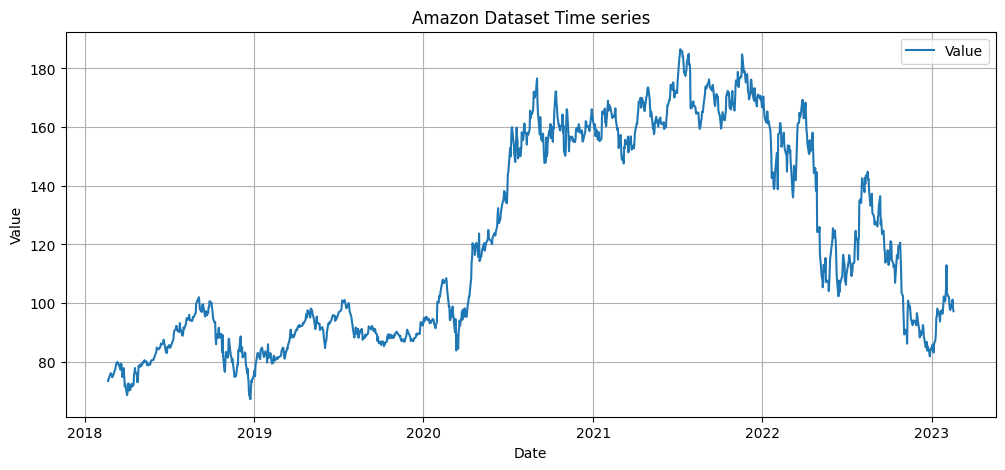

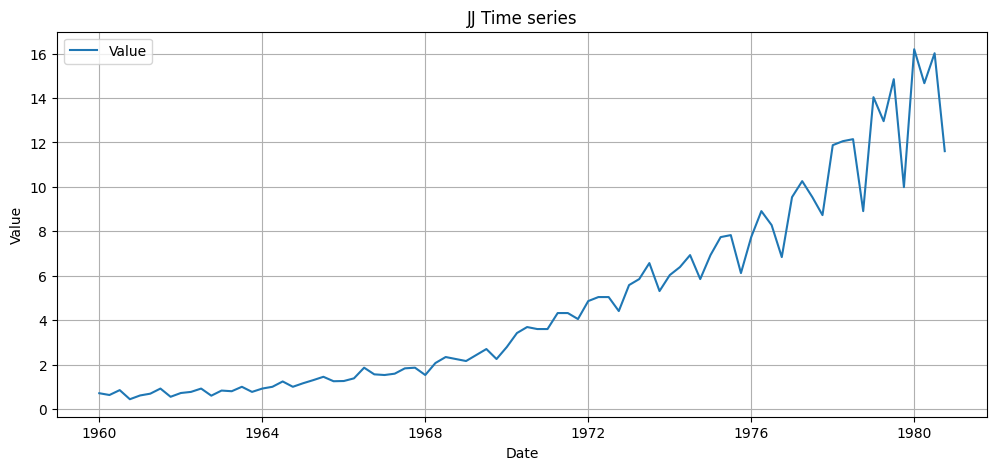

In [3]:
import matplotlib.pyplot as plt

def plot_series(df, title):
    plt.figure(figsize=(12, 5))
    plt.plot(df.index, df['Value'], label='Value')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_series(df_a, "Amazon Dataset Time series")
plot_series(df_b, "JJ Time series")


ACF and PACF plots

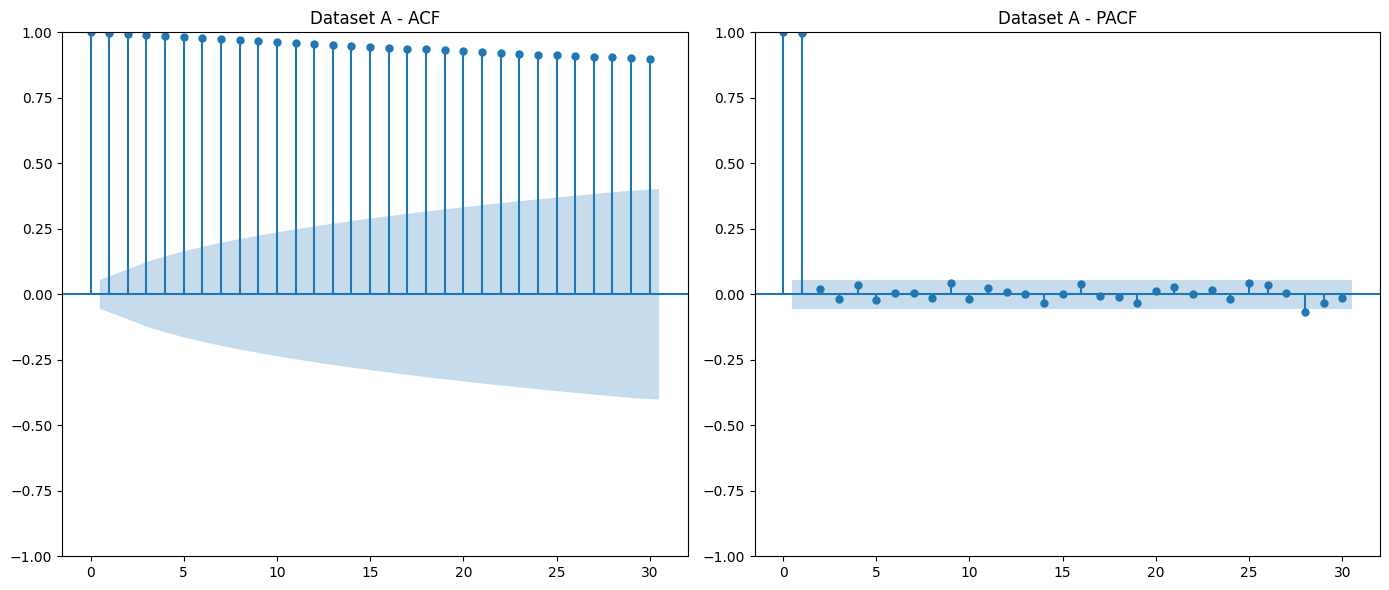

In [4]:
# Dataset A - ACF and PACF
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(df_a['Value'].dropna(), lags=30, ax=plt.gca())
plt.title('Dataset A - ACF')

plt.subplot(1, 2, 2)
plot_pacf(df_a['Value'].dropna(), lags=30, ax=plt.gca())
plt.title('Dataset A - PACF')

plt.tight_layout()
plt.show()


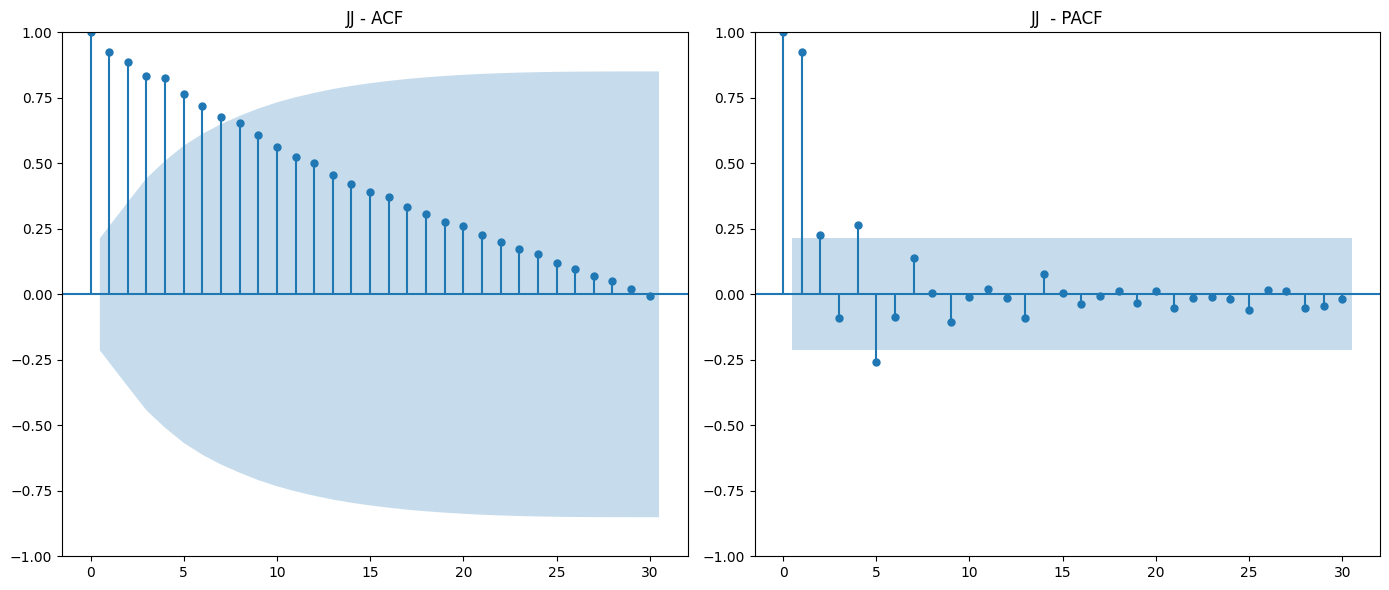

In [5]:
# Dataset A - ACF and PACF
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(df_b['Value'].dropna(), lags=30, ax=plt.gca())
plt.title('JJ - ACF')

plt.subplot(1, 2, 2)
plot_pacf(df_b['Value'].dropna(), lags=30, ax=plt.gca())
plt.title('JJ  - PACF')

plt.tight_layout()
plt.show()


i


In [7]:
from statsmodels.tsa.stattools import kpss


def test_stationarity(series, name):
    print(f"\n--- {name} ---")
    adf_result = adfuller(series)
    print(f"ADF Statistic: {adf_result[0]:.4f}, p-value: {adf_result[1]:.4f}")

    kpss_result = kpss(series, regression='c', nlags="auto")
    print(f"KPSS Statistic: {kpss_result[0]:.4f}, p-value: {kpss_result[1]:.4f}")

test_stationarity(df_a['Value'], "Amazon dataset")
test_stationarity(df_b['Value'], "JJ Dataset ")



--- Amazon dataset ---
ADF Statistic: -1.6578, p-value: 0.4530
KPSS Statistic: 2.9688, p-value: 0.0100

--- JJ Dataset  ---
ADF Statistic: 2.7420, p-value: 1.0000
KPSS Statistic: 1.3635, p-value: 0.0100


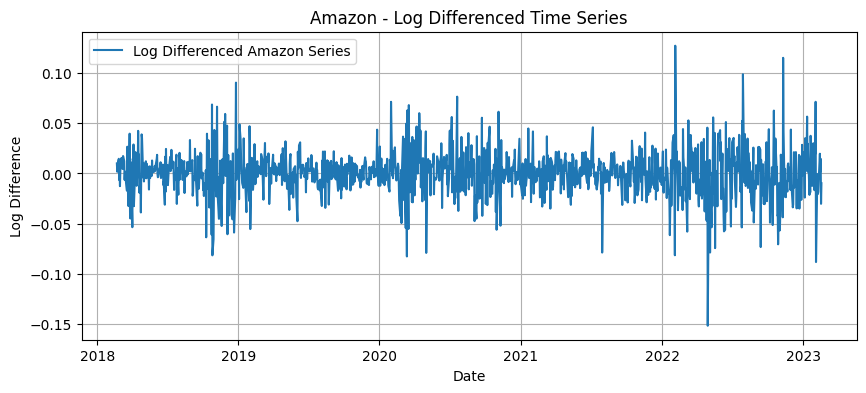

--- Amazon ADF Test ---
ADF Statistic: -36.6398
p-value: 0.0000
--- Amazon KPSS Test ---
KPSS Statistic: 0.2494
p-value: 0.1000


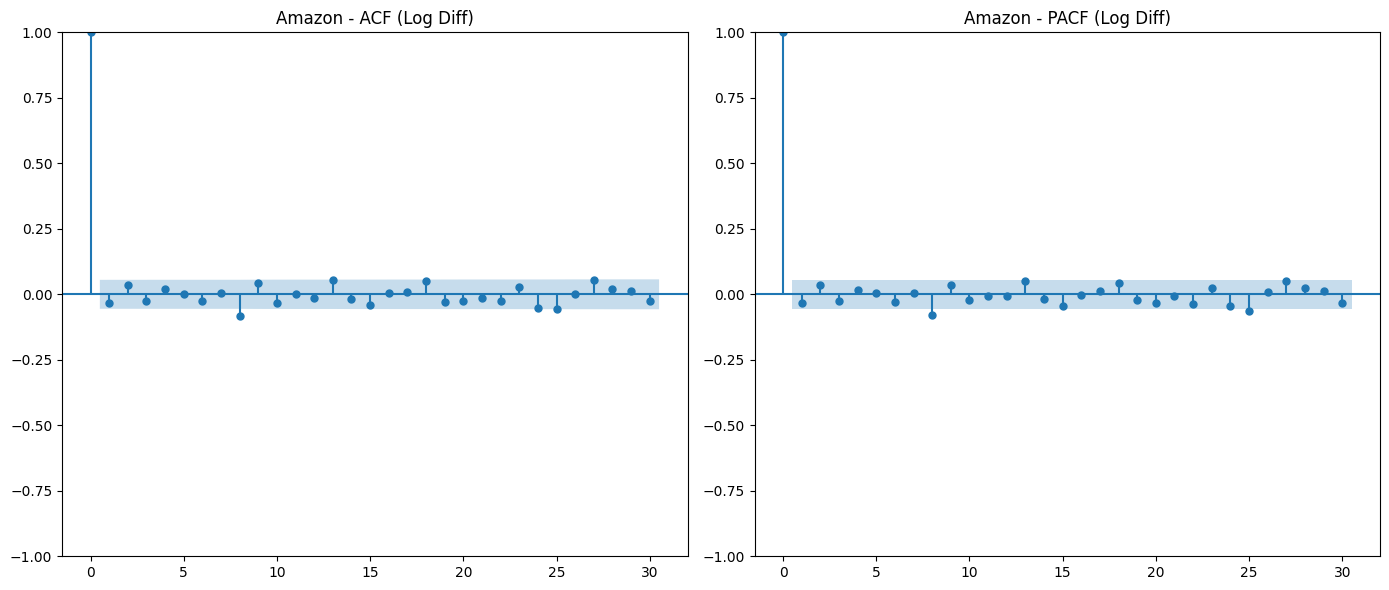

In [8]:

# 1. Log and 1st-order difference
amazon_log_diff = np.log(df_a['Value']).diff().dropna()

# 2. Plot the differenced time series
plt.figure(figsize=(10, 4))
plt.plot(amazon_log_diff, label='Log Differenced Amazon Series')
plt.title('Amazon - Log Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Log Difference')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(amazon_log_diff, lags=30, ax=plt.gca())
plt.title('Amazon - ACF (Log Diff)')

plt.subplot(1, 2, 2)
plot_pacf(amazon_log_diff, lags=30, ax=plt.gca())
plt.title('Amazon - PACF (Log Diff)')

plt.tight_layout()

# 3. ADF test
adf_result = adfuller(amazon_log_diff)
print('--- Amazon ADF Test ---')
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')

# 4. KPSS test
kpss_result = kpss(amazon_log_diff, regression='c', nlags='auto')
print('--- Amazon KPSS Test ---')
print(f'KPSS Statistic: {kpss_result[0]:.4f}')
print(f'p-value: {kpss_result[1]:.4f}')


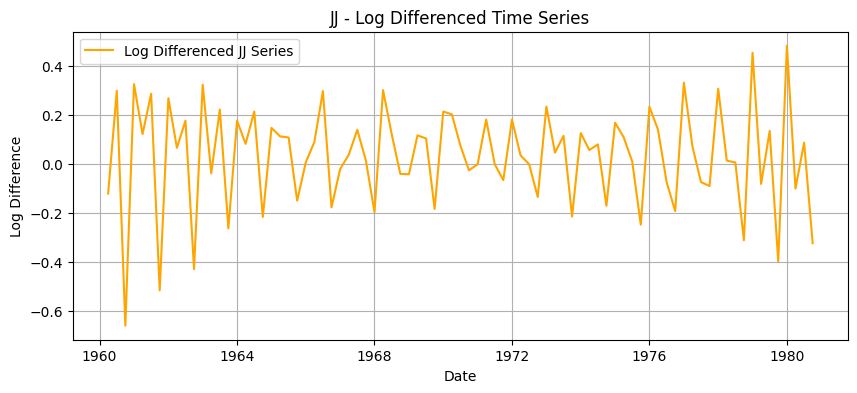

--- JJ ADF Test ---
ADF Statistic: -4.3170
p-value: 0.0004
--- JJ KPSS Test ---
KPSS Statistic: 0.1482
p-value: 0.1000


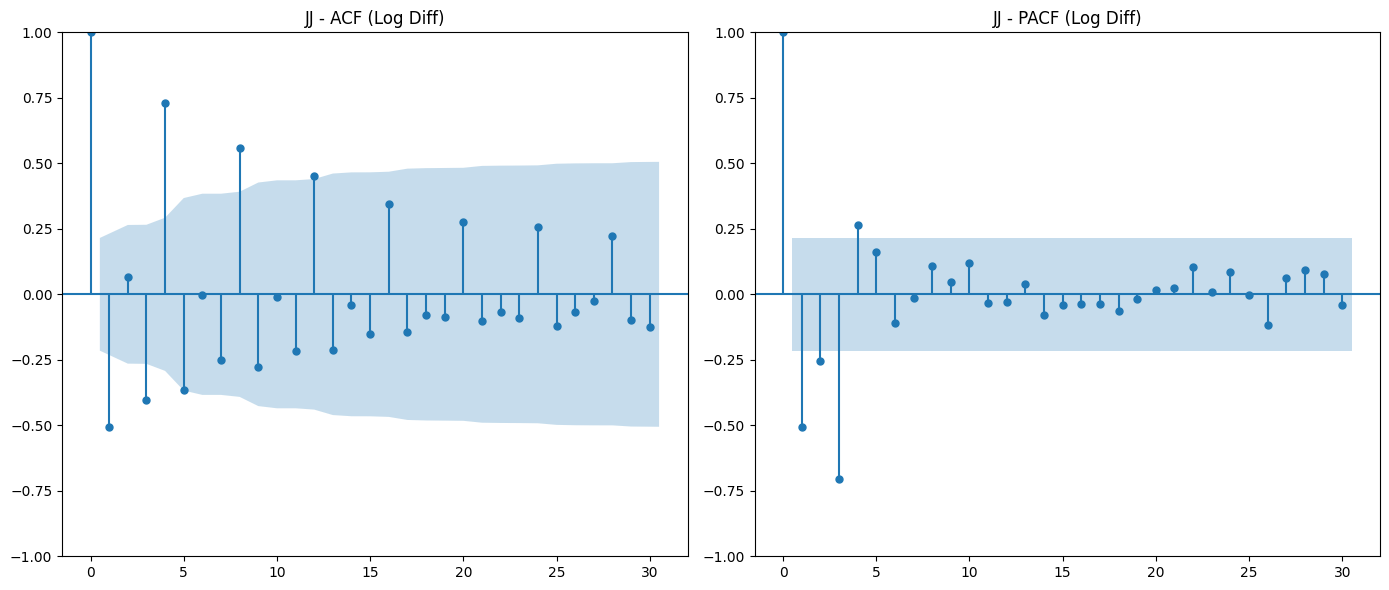

In [9]:
# 1. Log and 1st-order difference
jj_log_diff = np.log(df_b['Value']).diff().dropna()

# 2. Plot the differenced time series
plt.figure(figsize=(10, 4))
plt.plot(jj_log_diff, label='Log Differenced JJ Series', color='orange')
plt.title('JJ - Log Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Log Difference')
plt.grid(True)
plt.legend()
plt.show()

# ACF and PACF plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(jj_log_diff, lags=30, ax=plt.gca())
plt.title('JJ - ACF (Log Diff)')

plt.subplot(1, 2, 2)
plot_pacf(jj_log_diff, lags=30, ax=plt.gca())
plt.title('JJ - PACF (Log Diff)')

plt.tight_layout()

# 3. ADF test
adf_result = adfuller(jj_log_diff)
print('--- JJ ADF Test ---')
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')

# 4. KPSS test
kpss_result = kpss(jj_log_diff, regression='c', nlags='auto')
print('--- JJ KPSS Test ---')
print(f'KPSS Statistic: {kpss_result[0]:.4f}')
print(f'p-value: {kpss_result[1]:.4f}')


In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from itertools import product
from tqdm import tqdm_notebook

# Function to optimize ARIMA model
def optimize_ARIMA(endog, order_list):
    """
    Return dataframe with parameters and corresponding AIC

    order_list - list with (p, d, q) tuples
    endog - the observed variable, in this case data['data']
    """

    results = []

    for order in tqdm_notebook(order_list):
        try:
            # Fit the ARIMA model with given (p, d, q)
            model = ARIMA(endog, order=order)
            model_fit = model.fit()
        except:
            continue

        aic = model_fit.aic
        results.append([order, model_fit.aic])

    # Convert results to DataFrame
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']

    # Sort by AIC value (lower is better)
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

# Function to find best ARIMA model for a dataset
def get_best_arima_model(data, dataset_name):
    print(f"Optimizing ARIMA model for {dataset_name}...")

    # Define possible (p, d, q) combinations
    ps = range(0, 8, 1)
    qs = range(0, 8, 1)
    parameters = product(ps, qs)
    parameters_list = list(parameters)

    # Insert d=1 to all orders (since you applied differencing)
    order_list = [(p, 1, q) for (p, q) in parameters_list]

    # Get the optimized ARIMA results
    result_df = optimize_ARIMA(data['Value'], order_list)

    # Print the ordered list of models with AIC
    print(result_df.head())

    # Get the best model with the lowest AIC
    best_order = result_df.iloc[0]['(p, d, q)']
    print(f"Best ARIMA order for {dataset_name}: {best_order}")

    # Fit the best model
    best_model = ARIMA(data['Value'], order=best_order)
    best_model_fit = best_model.fit()

    # Print summary of the best model
    print(f"ARIMA model summary for {dataset_name}:")
    print(best_model_fit.summary())

    return best_model_fit

# Example usage for Amazon dataset (replace df_a with your actual Amazon dataset)
# Replace 'df_a' and 'df_b' with your actual datasets for the two datasets
amazon_best_model = get_best_arima_model(df_a, "Amazon")

# Example usage for JJ dataset (replace df_b with your actual JJ dataset)
jj_best_model = get_best_arima_model(df_b, "JJ")


Optimizing ARIMA model for Amazon...


  0%|          | 0/64 [00:00<?, ?it/s]

   (p, d, q)          AIC
0  (2, 1, 2)  6122.315476
1  (3, 1, 2)  6124.039832
2  (2, 1, 3)  6124.044468
3  (3, 1, 3)  6125.304890
4  (4, 1, 2)  6125.951759
Best ARIMA order for Amazon: (2, 1, 2)
ARIMA model summary for Amazon:
                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                 1259
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3056.158
Date:                Thu, 10 Apr 2025   AIC                           6122.315
Time:                        21:52:37   BIC                           6148.002
Sample:                             0   HQIC                          6131.969
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

  0%|          | 0/64 [00:00<?, ?it/s]

   (p, d, q)         AIC
0  (6, 1, 3)  115.297318
1  (4, 1, 6)  115.859233
2  (7, 1, 1)  116.050450
3  (5, 1, 3)  116.536224
4  (5, 1, 4)  117.242599
Best ARIMA order for JJ: (6, 1, 3)
ARIMA model summary for JJ:
                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   84
Model:                 ARIMA(6, 1, 3)   Log Likelihood                 -47.649
Date:                Thu, 10 Apr 2025   AIC                            115.297
Time:                        21:53:13   BIC                            139.486
Sample:                             0   HQIC                           125.015
                                 - 84                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

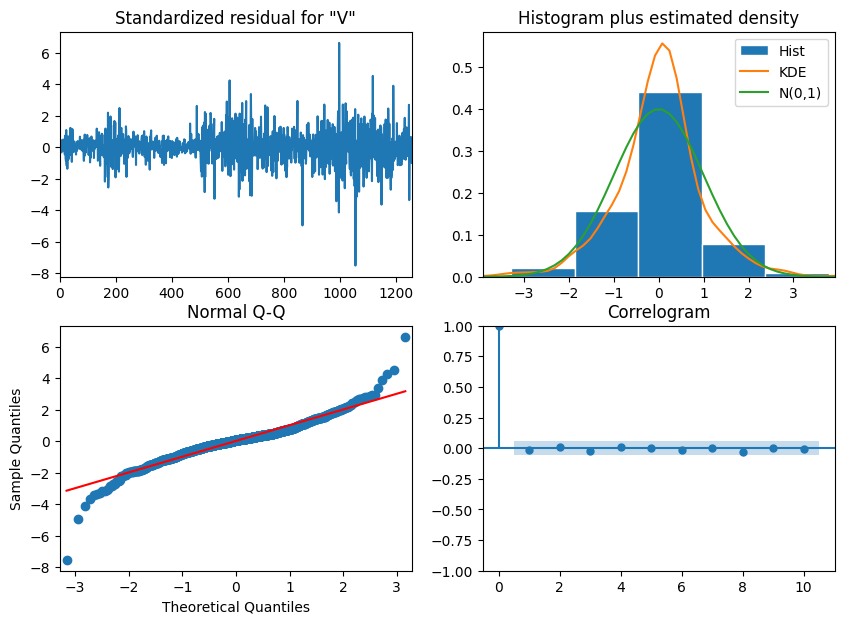

In [12]:
amazon_best_model.plot_diagnostics(figsize=(10,7))
plt.show()

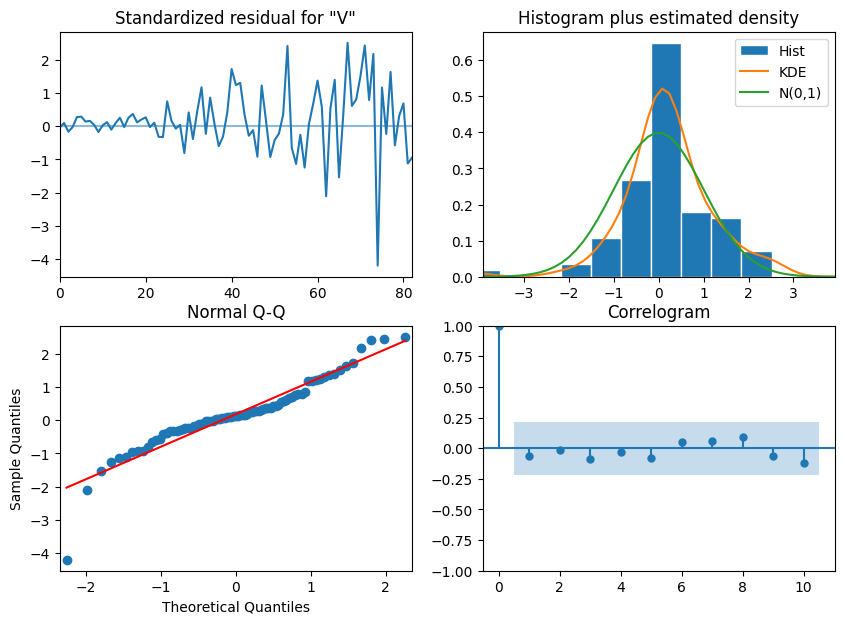

In [13]:
jj_best_model.plot_diagnostics(figsize=(10,7))
plt.show()

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def run_forecasting_pipeline(data, model_fit, dataset_name, forecast_months=24):
    # Step 1: Get prediction range
    pred_start_date = data.index[0]
    pred_end_date = data.index[-1]

    # Step 2: Get predictions and residuals
    predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
    residuals = data - predictions

    # Step 3: Plot residuals
    plt.figure(figsize=(10, 4))
    plt.plot(residuals)
    plt.title(f'Residuals from ARIMA Model - {dataset_name}', fontsize=20)
    plt.axhline(0, color='r', linestyle='--', alpha=0.5)
    plt.ylabel('Error')
    plt.grid(True)
    plt.show()

    # Step 4: Root Mean Squared Error
    rmse = np.sqrt(np.mean(residuals**2))
    print(f'{dataset_name} RMSE:', round(rmse, 4))

    # Step 5: Plot actual vs prediction
    plt.figure(figsize=(10, 4))
    plt.plot(data, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(f'ARIMA Model Fit - {dataset_name}', fontsize=20)
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Step 6: Accuracy metrics
    def forecast_accuracy(forecast, actual):
        mape = np.mean(np.abs(forecast - actual)/np.abs(actual))
        me = np.mean(forecast - actual)
        mae = np.mean(np.abs(forecast - actual))
        mpe = np.mean((forecast - actual)/actual)
        rmse = np.sqrt(np.mean((forecast - actual)**2))
        corr = np.corrcoef(forecast, actual)[0,1]
        mins = np.amin(np.vstack([forecast, actual]), axis=0)
        maxs = np.amax(np.vstack([forecast, actual]), axis=0)
        minmax = 1 - np.mean(mins / maxs)
        return {
            'mape': mape, 'me': me, 'mae': mae, 'mpe': mpe,
            'rmse': rmse, 'corr': corr, 'minmax': minmax
        }

    accuracy = forecast_accuracy(predictions.values, data.values)
    print(f'\nAccuracy Metrics for {dataset_name}:')
    for k, v in accuracy.items():
        print(f'{k.upper()}: {round(v, 4)}')

    # Step 7: Forecast next 24 months
    forecast_result = model_fit.get_forecast(steps=forecast_months)
    forecast_values = forecast_result.predicted_mean
    conf_int = forecast_result.conf_int()

    forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=forecast_months, freq='M')

    # Step 8: Plot forecast
    plt.figure(figsize=(12, 6))
    plt.plot(data, label='Historical Data')
    plt.plot(forecast_index, forecast_values, 'k--', label='Forecast')
    plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='lightgray', alpha=0.5)
    plt.title(f'{dataset_name} Forecast (Next {forecast_months} Months)', fontsize=20)
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    plt.show()


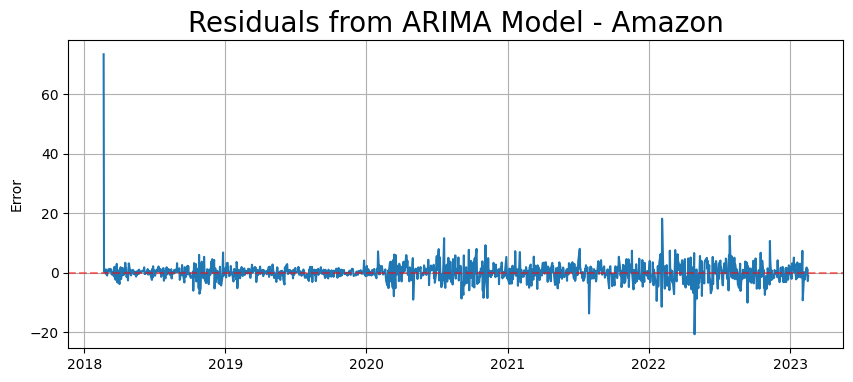

Amazon RMSE: 3.4377


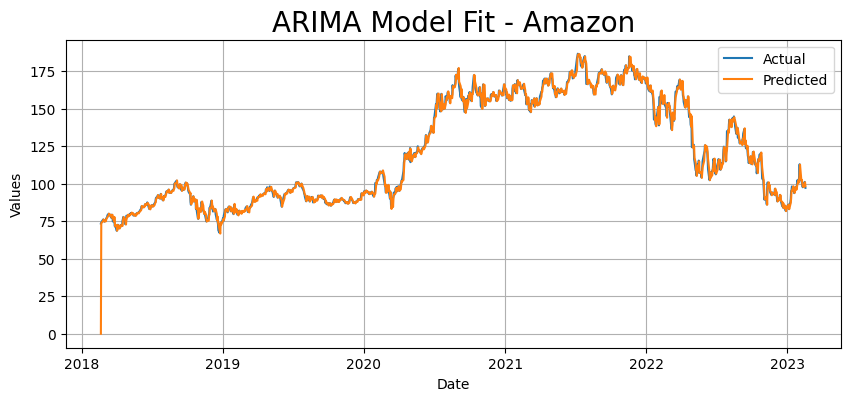


Accuracy Metrics for Amazon:
MAPE: 0.0169
ME: -0.0771
MAE: 1.9761
MPE: -0.0008
RMSE: 3.4377
CORR: 0.9951
MINMAX: 0.0167


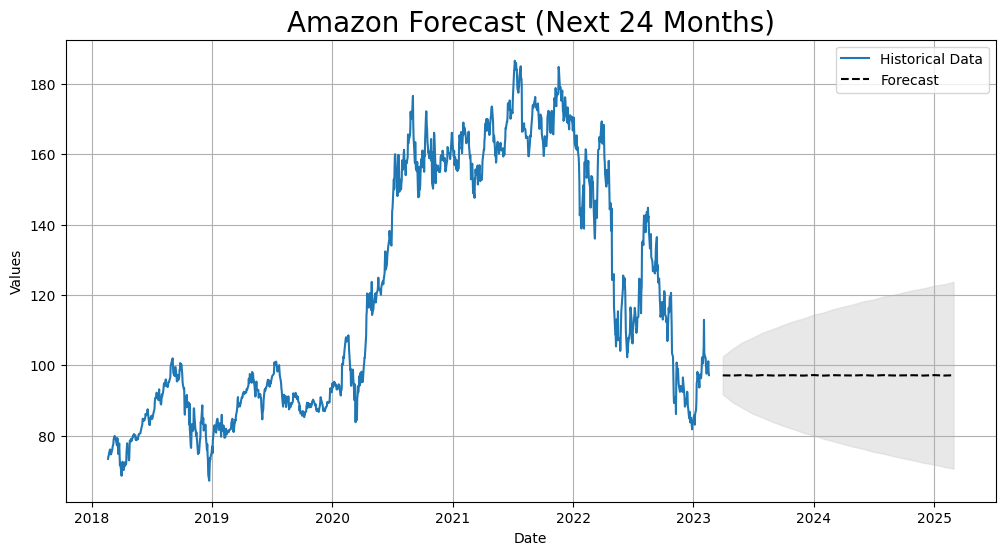

In [ ]:
run_forecasting_pipeline(df_a['Value'], amazon_best_model, 'Amazon')

#run_forecasting_pipeline(df_jj['Value'], best_model_fit_jj, 'Johnson & Johnson')


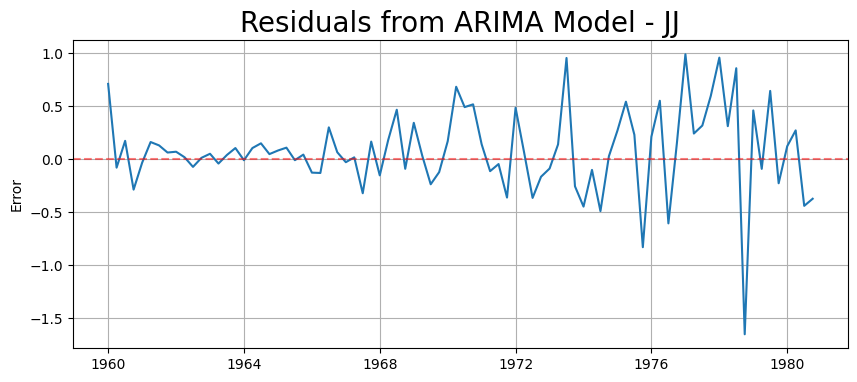

JJ RMSE: 0.3999


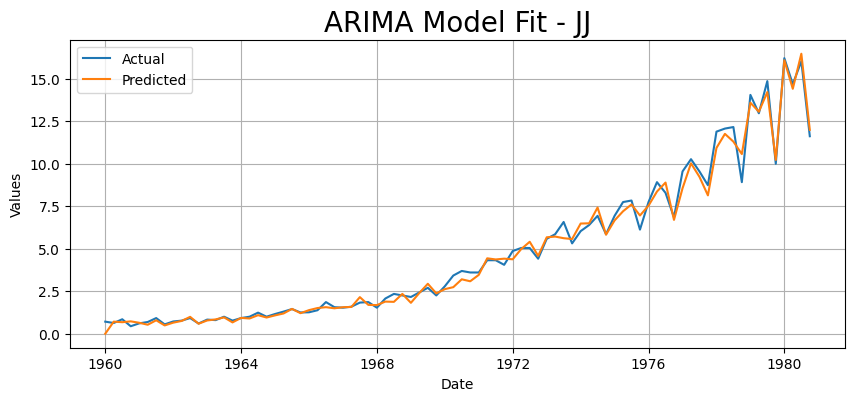


Accuracy Metrics for JJ:
MAPE: 0.0895
ME: -0.0791
MAE: 0.279
MPE: -0.0276
RMSE: 0.3999
CORR: 0.9958
MINMAX: 0.0844


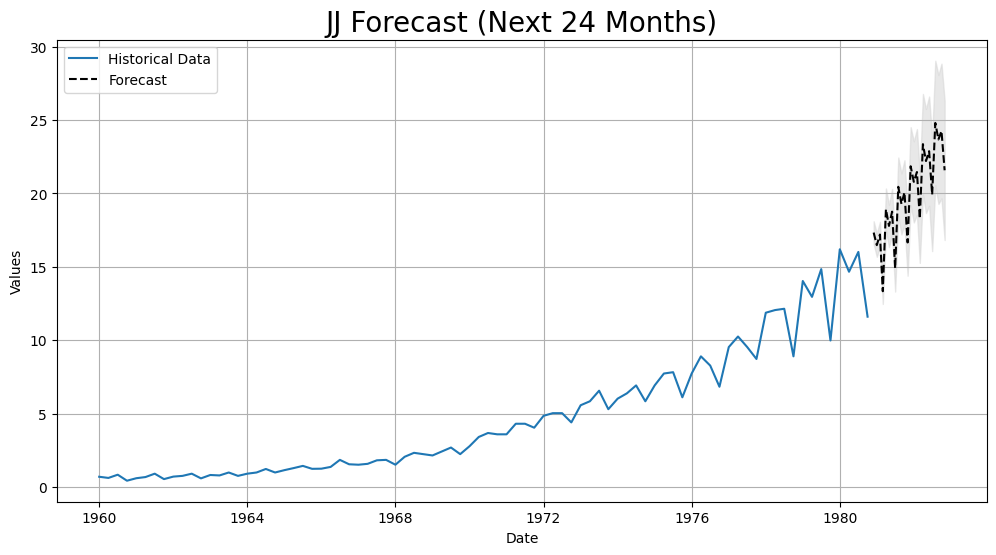

In [ ]:
run_forecasting_pipeline(df_b['Value'], jj_best_model, 'JJ')

i

In [15]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

def preprocess_for_rnn(df, window_size=12):
    values = df['Value'].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(values)

    X, y = [], []
    for i in range(window_size, len(scaled)):
        X.append(scaled[i-window_size:i])
        y.append(scaled[i])
    X, y = np.array(X), np.array(y)

    # Split 80/20
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    return X_train, X_test, y_train, y_test, scaler, scaled


In [16]:
def train_lstm_model(X_train, y_train, X_test, y_test, scaler, scaled_data, window_size=12, n_forecast=24):
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

    # Predict
    y_pred = model.predict(X_test)
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_test_inv = scaler.inverse_transform(y_test)

    print("LSTM RMSE:", np.sqrt(mean_squared_error(y_test_inv, y_pred_inv)))
    print("LSTM MAE:", mean_absolute_error(y_test_inv, y_pred_inv))

    # Forecast
    forecast_input = scaled_data[-window_size:].reshape(1, window_size, 1)
    forecast = []
    for _ in range(n_forecast):
        next_val = model.predict(forecast_input)[0]
        forecast.append(next_val)
        forecast_input = np.append(forecast_input[:, 1:, :], [[next_val]], axis=1)

    forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))
    return forecast


In [17]:
def train_gru_model(X_train, y_train, X_test, y_test, scaler, scaled_data, window_size=12, n_forecast=24):
    model = Sequential()
    model.add(GRU(64, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

    # Predict
    y_pred = model.predict(X_test)
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_test_inv = scaler.inverse_transform(y_test)

    print("GRU RMSE:", np.sqrt(mean_squared_error(y_test_inv, y_pred_inv)))
    print("GRU MAE:", mean_absolute_error(y_test_inv, y_pred_inv))

    # Forecast
    forecast_input = scaled_data[-window_size:].reshape(1, window_size, 1)
    forecast = []
    for _ in range(n_forecast):
        next_val = model.predict(forecast_input)[0]
        forecast.append(next_val)
        forecast_input = np.append(forecast_input[:, 1:, :], [[next_val]], axis=1)

    forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))
    return forecast


In [18]:
window_size = 12
X_train_a, X_test_a, y_train_a, y_test_a, scaler_a, scaled_a = preprocess_for_rnn(df_a, window_size)

forecast_lstm_amazon = train_lstm_model(X_train_a, y_train_a, X_test_a, y_test_a, scaler_a, scaled_a, window_size)
forecast_gru_amazon = train_gru_model(X_train_a, y_train_a, X_test_a, y_test_a, scaler_a, scaled_a, window_size)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
LSTM RMSE: 5.001439385228678
LSTM MAE: 3.953582558857421
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37m

In [19]:
# Check and handle NaNs in Johnson & Johnson data
print("NaNs in JJ before cleaning:", df_b['Value'].isna().sum())

# Option 1: Drop rows with NaN
df_b = df_b.dropna()

# Option 2 (Alternative): Fill with interpolation
# df_b['Value'] = df_b['Value'].interpolate()

print("NaNs in JJ after cleaning:", df_b['Value'].isna().sum())


NaNs in JJ before cleaning: 0
NaNs in JJ after cleaning: 0


In [20]:
X_train_jj, X_test_jj, y_train_jj, y_test_jj, scaler_jj, scaled_jj = preprocess_for_rnn(df_b, window_size)

forecast_lstm_jj = train_lstm_model(X_train_jj, y_train_jj, X_test_jj, y_test_jj, scaler_jj, scaled_jj, window_size)
forecast_gru_jj = train_gru_model(X_train_jj, y_train_jj, X_test_jj, y_test_jj, scaler_jj, scaled_jj, window_size)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
LSTM RMSE: 2.096046754295063
LSTM MAE: 1.7306642334350586
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

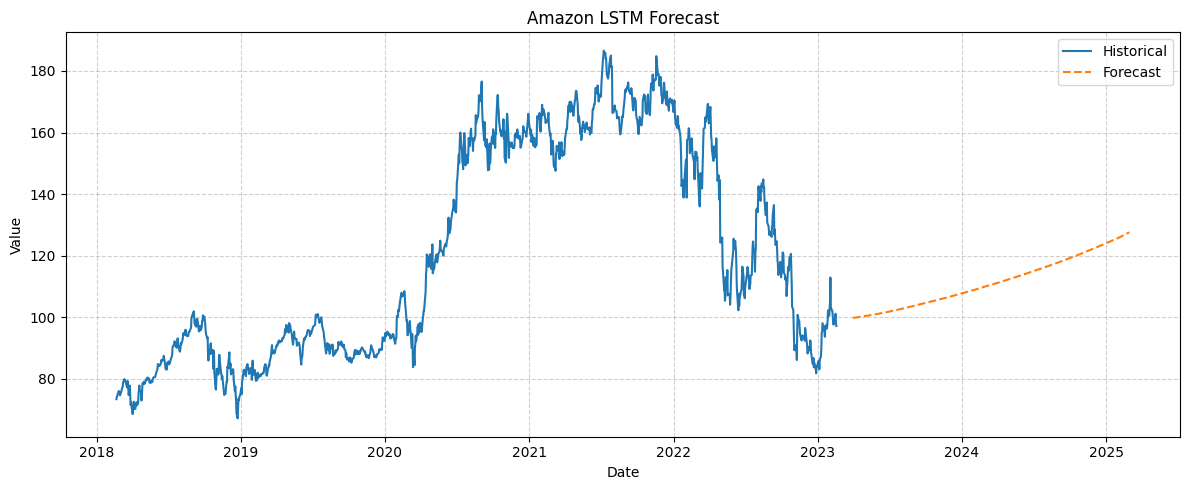

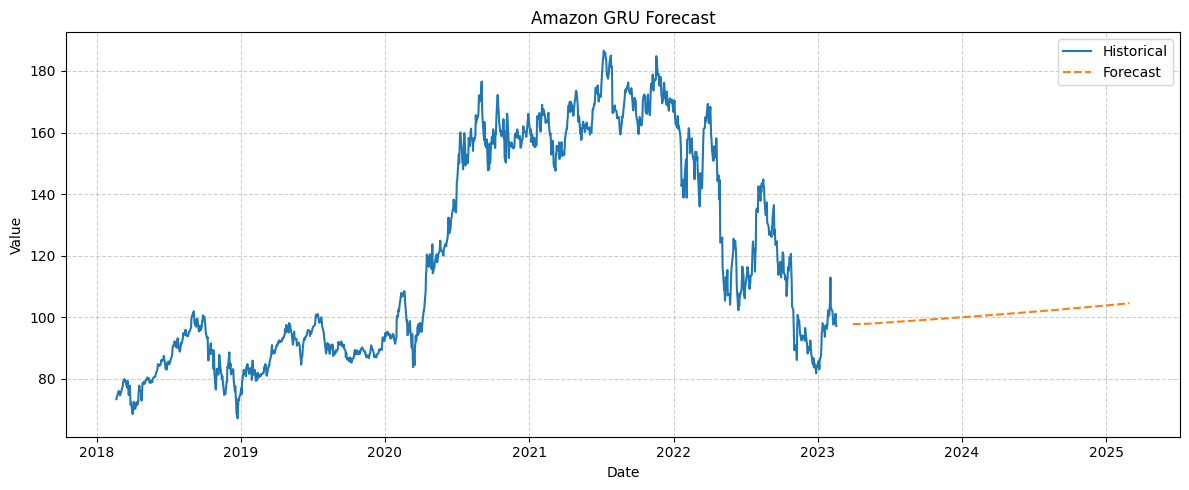

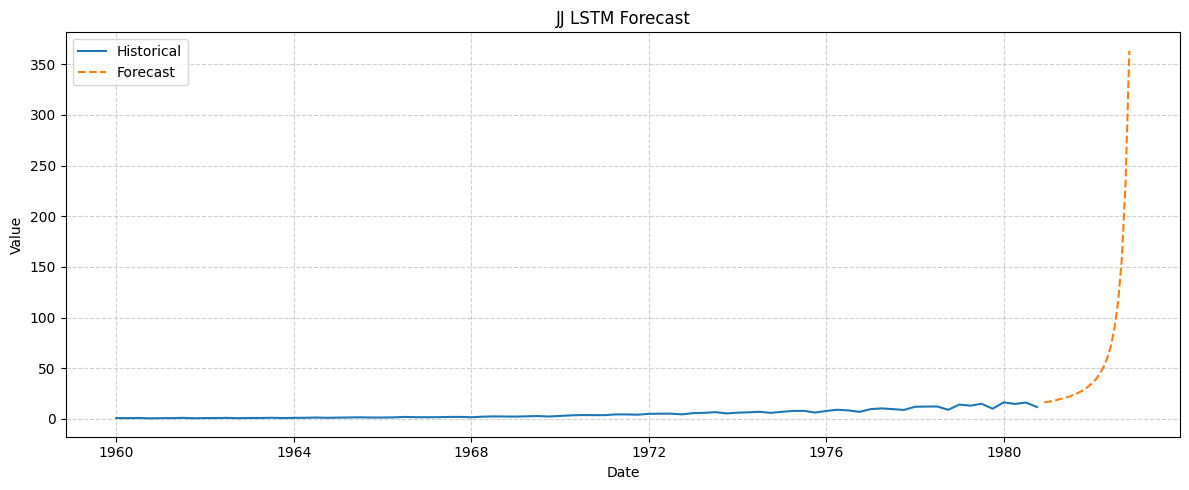

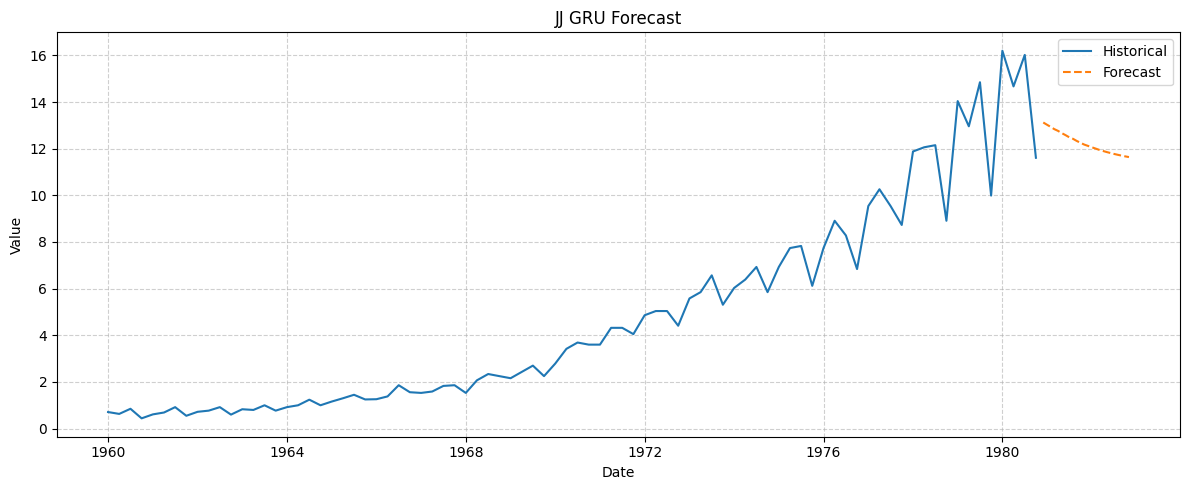

In [27]:
def plot_forecast(original_df, forecast, title):
    future_dates = pd.date_range(start=original_df.index[-1] + pd.DateOffset(months=1), periods=len(forecast), freq='M')
    forecast_df = pd.DataFrame(forecast, index=future_dates, columns=['Forecast'])

    plt.figure(figsize=(12, 5))
    plt.plot(original_df.index, original_df['Value'], label='Historical')
    plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', linestyle='--')

    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

plot_forecast(df_a, forecast_lstm_amazon, "Amazon LSTM Forecast")
plot_forecast(df_a, forecast_gru_amazon, "Amazon GRU Forecast")

plot_forecast(df_b, forecast_lstm_jj, "JJ LSTM Forecast")
plot_forecast(df_b, forecast_gru_jj, "JJ GRU Forecast")
